## Apple Mobility data processing

In [1]:
import pandas as pd
import numpy as np

In [3]:
apple = pd.read_csv('../data_sources/applemobilitytrends-2021-08-12.csv')
apple

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3,4) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12
0,country/region,Albania,driving,NaN,NaN,NaN,100.0,95.30,101.43,97.20,...,359.48,367.48,397.45,409.22,424.75,408.65,445.31,432.02,425.92,427.53
1,country/region,Albania,walking,NaN,NaN,NaN,100.0,100.68,98.93,98.46,...,305.67,315.95,322.90,357.65,336.55,316.97,359.91,362.22,373.30,361.54
2,country/region,Argentina,driving,NaN,NaN,NaN,100.0,97.07,102.45,111.21,...,73.32,75.93,79.32,107.97,130.56,60.93,67.70,72.97,77.70,83.78
3,country/region,Argentina,walking,NaN,NaN,NaN,100.0,95.11,101.37,112.67,...,70.74,68.89,70.38,93.11,100.36,39.50,59.79,67.47,69.68,74.27
4,country/region,Australia,driving,AU,NaN,NaN,100.0,102.98,104.21,108.63,...,85.13,86.43,78.32,66.63,55.40,75.12,78.55,80.66,83.20,87.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4686,county,York County,walking,NaN,Pennsylvania,United States,100.0,110.22,121.82,109.72,...,213.59,205.52,210.83,262.93,225.25,178.18,211.16,197.90,205.52,215.30
4687,county,Young County,driving,NaN,Texas,United States,100.0,98.85,97.76,92.21,...,158.40,159.96,160.09,206.78,194.99,142.62,160.50,161.92,154.47,175.61
4688,county,Yuba County,driving,NaN,California,United States,100.0,102.98,103.10,114.08,...,156.55,169.80,174.17,191.53,164.74,149.79,164.59,157.04,174.87,166.15
4689,county,Yuma County,driving,NaN,Arizona,United States,100.0,101.82,106.67,108.93,...,117.82,121.38,124.92,147.89,124.20,112.90,119.21,111.63,112.15,128.04


In [4]:
apple.loc[apple.region=='London']

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12
541,city,London,driving,NaN,England,United Kingdom,100.0,107.65,111.20,108.29,...,118.56,129.75,124.28,140.92,131.28,114.21,121.66,124.89,125.81,125.69
542,city,London,transit,NaN,England,United Kingdom,100.0,105.14,107.06,106.08,...,129.47,136.40,129.80,141.17,145.25,124.36,126.83,139.04,137.16,137.76
543,city,London,walking,NaN,England,United Kingdom,100.0,108.89,116.84,118.82,...,124.07,136.27,125.00,136.22,154.43,107.85,112.02,132.93,136.08,134.83


In [5]:
apple.loc[apple.region=='Hong Kong']

,geo_type,region,transportation_type,alternative_name,sub-region,country,2020-01-13,2020-01-14,2020-01-15,2020-01-16,...,2021-08-03,2021-08-04,2021-08-05,2021-08-06,2021-08-07,2021-08-08,2021-08-09,2021-08-10,2021-08-11,2021-08-12
50,country/region,Hong Kong,driving,香港,NaN,NaN,100.0,106.79,111.30,116.00,...,74.07,72.75,72.15,84.41,79.63,74.72,72.98,73.47,74.82,76.53
51,country/region,Hong Kong,walking,香港,NaN,NaN,100.0,109.20,114.16,117.93,...,80.06,79.31,80.78,96.63,90.59,85.08,82.95,85.55,86.03,89.27


In [6]:
london = apple[apple.region=='London'].drop(['geo_type', 'region', 'alternative_name',
                                             'sub-region', 'country'], axis=1)
london.set_index('transportation_type', inplace=True)
london = london.transpose()
london = london.loc[:'2021-07-31']  # Trim to the end of July
london

transportation_type,driving,transit,walking
2020-01-13,100.00,100.00,100.00
2020-01-14,107.65,105.14,108.89
2020-01-15,111.20,107.06,116.84
2020-01-16,108.29,106.08,118.82
2020-01-17,115.08,115.13,132.18
...,...,...,...
2021-07-27,117.89,124.47,114.84
2021-07-28,121.36,124.82,114.32
2021-07-29,124.26,130.50,131.17
2021-07-30,139.94,140.32,132.28


In [8]:
london.to_csv('../datasets/apple_london.csv')

In [10]:
sydney = apple[apple.region=='Sydney'].drop(['geo_type', 'region', 'alternative_name',
                                             'sub-region', 'country'], axis=1)
sydney.set_index('transportation_type', inplace=True)
sydney = sydney.transpose()
sydney = sydney.loc[:'2021-07-31']  # Trim to the end of July
sydney.to_csv('../datasets/apple_sydney.csv')

In [13]:
new_york = apple[apple.region=='New York City'].drop(['geo_type', 'region', 'alternative_name',
                                             'sub-region', 'country'], axis=1)
new_york.set_index('transportation_type', inplace=True)
new_york = new_york.transpose()
new_york = new_york.loc[:'2021-07-31']  # Trim to the end of July
new_york.to_csv('../datasets/apple_new_york.csv')

In [15]:
hong_kong = apple[apple.region=='Hong Kong'].drop(['geo_type', 'region', 'alternative_name',
                                             'sub-region', 'country'], axis=1)
hong_kong.set_index('transportation_type', inplace=True)
hong_kong = hong_kong.transpose()
hong_kong = hong_kong.loc[:'2021-07-31']  # Trim to the end of July
hong_kong.to_csv('../datasets/apple_hong_kong.csv')

In [16]:
# First Lockdown
london.loc['2020-03-23':'2020-05-13'].mean()

transportation_type
driving    34.4932
transit    14.8884
walking    26.4052
dtype: float64

In [17]:
# Second lockdown
london.loc['2020-11-05':'2020-12-02'].mean()

transportation_type
driving    71.091071
transit    46.813571
walking    50.173929
dtype: float64

In [18]:
# Third lockdown
london.loc['2020-12-20':'2021-03-08'].mean()

transportation_type
driving    60.677848
transit    38.260759
walking    42.812911
dtype: float64

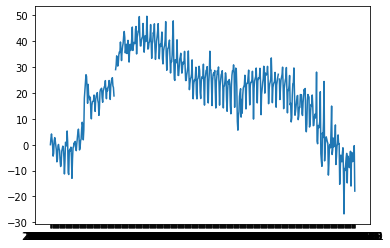

In [19]:
import matplotlib.pyplot as plt
difference = london.driving-london.transit
plt.plot(difference.index, difference)